# Chapter 06 

# Dimensionality Reduction: Squashing the Data Pancake with PCA

### Feature Engineering for ML by Alice Zhang, Amanda Casari 

### Review by YK Lee

#### Essentials

- Dimensionality reduction: getting rid of 'uniformative information'

- How to define 'uninformative'?
    - redundant and sparse 
    - linear dependency (column space of data matrix = span of all feature vectors): linearly dependent features = waste of space and computation power
    
- To replace redundant featurew with a few new features that _adequately summarize information_ contained in the original feature space

    - mathematically describe the new features and optimization techniques to find them
    
    - _adequately summarize information?_ : the new feature should retain as much of the original volume as possbile. 
    - Then, we should measure the 'volume' to know whether the original volume is kept as much as possible
    
 - Volume? 
 
     - Volume = distance
         - maximizing distance between any two pairs of points
         - maximizing average distance between pairs of points (= average distance between each point and its mean) = **variance**
         

#### PCA in detail (but in easier terms)

- StatQuest [link](https://www.youtube.com/watch?v=FgakZw6K1QQ)


#### PCA steps
 
 
 1. Center the data matrix
 
 2. Compute the SVD
 
 3. Find the principal components
 
 4. Transform the data (the first _k_ columns of U) 
    
    

#### PCA in Action

Let's try with MNIST dataset

MNIST dataset : 

The original images are 28 * 28 pixels. A lower-resolution subset of the images is distributed with scikit-learn, which each image is downsampled into 8*8 pixels. 

The original data in scikit-learn has 64 dimensions. 

Let's <strong>apply PCA</strong> and <b>visualize the dataset</b> using the first <b>three principal components</b>

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
#load the data
digits_data = datasets.load_digits()
n= len(digits_data.images)

In [4]:
#Each image is represented as an 8 * 8 array. Flatten this array as input to PCA
image_data = digits_data.images.reshape((n, -1))
image_data.shape

(1797, 64)

In [5]:
#Groundtruth label of the number appearing in each image
labels = digits_data.target
labels

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
#Fit a PCA transformer to the dataset
# The number of components is automatically chosen to account for at least 80% of the total variance

pca_transformer = PCA(n_components=0.8)
pca_images = pca_transformer.fit_transform(image_data)
pca_transformer.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [11]:
pca_transformer.explained_variance_ratio_[:3].sum()

0.403039585876751

The first three principal components account for roughly 40% of the total variance in the dataset. This is by no means perfect, but it allows for a handy low-dimensional visualization 

<IPython.core.display.Javascript object>


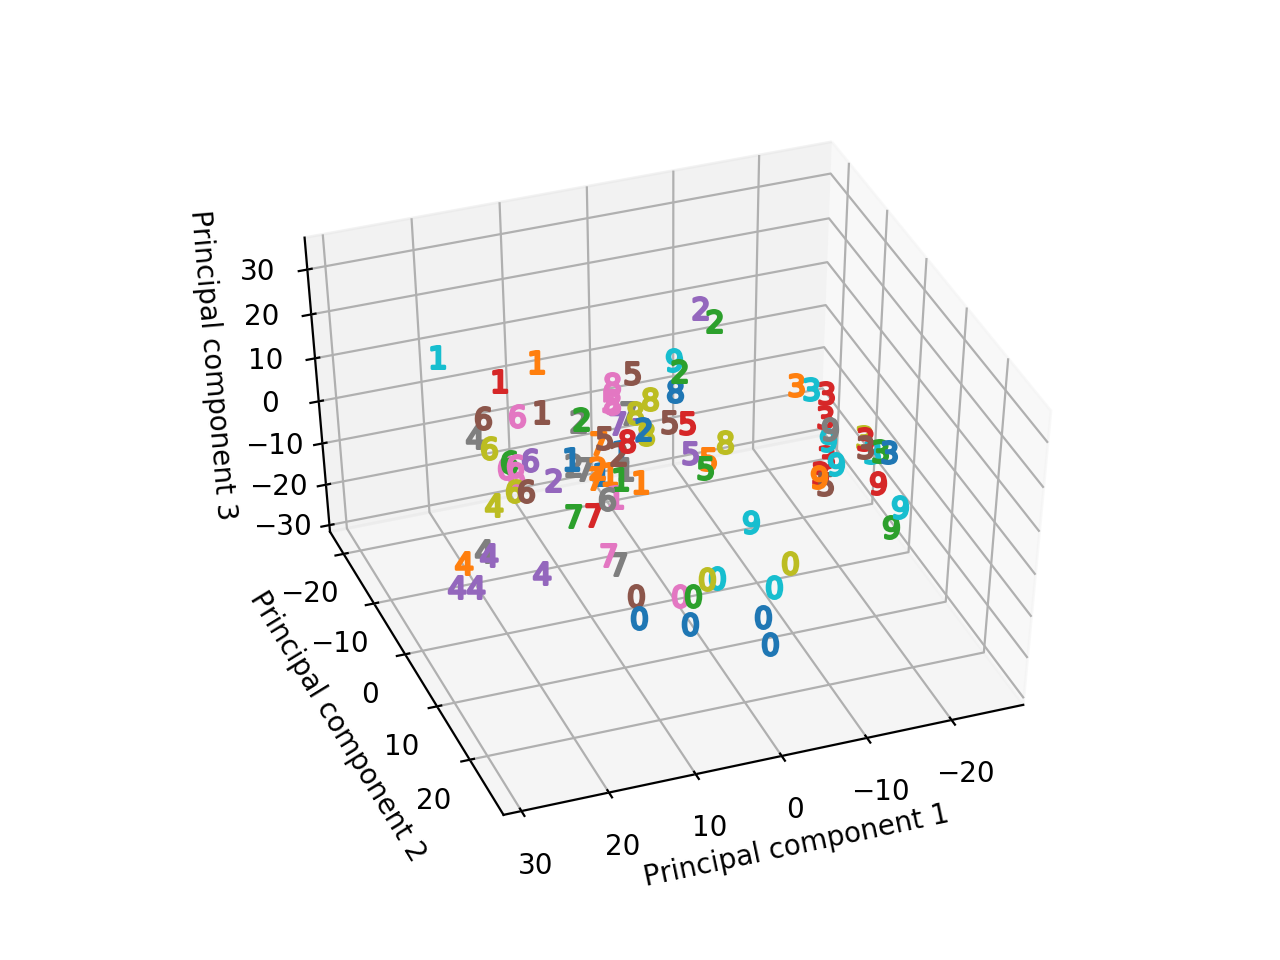

Text(0.5, 0, 'Principal component 3')

In [15]:
#Visualize the results
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(100):
    ax.scatter(pca_images[i,0], pca_images[i,1], 
               pca_images[i,2], marker=r'${}$'.format(labels[i]),s=64)
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3')


We see that PCA groups similar numbers close to each other. The numbers 0 and 6 lie in the same region, as do 1 and 7, and 3 and 9. The space is roughly divided between 0, 4, and 6 on one side, and the rest of the num‐ bers on the other.